In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
d={ "Area":[2000,2300,3000,3700,4100],
   "price":[480000,520000,610000,700000,730000] 
}
print(d)
print(type(d))

{'Area': [2000, 2300, 3000, 3700, 4100], 'price': [480000, 520000, 610000, 700000, 730000]}
<class 'dict'>


In [28]:
df=pd.DataFrame(d)
df


,Area,price
0,2000,480000
1,2300,520000
2,3000,610000
3,3700,700000
4,4100,730000


In [29]:
df.shape


(5, 2)

In [30]:
df.isnull().sum()

Area     0
price    0
dtype: int64

In [31]:
df.duplicated().sum()

0

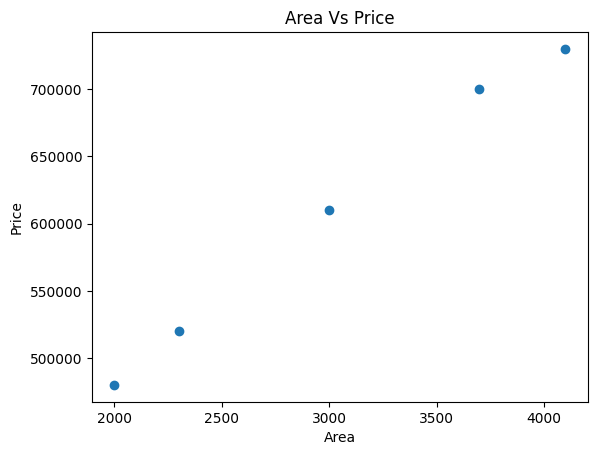

In [32]:
plt.scatter(df["Area"],df["price"])
plt.title("Area Vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


In [33]:
x = df[['Area']]
y = df['price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(5, 1)
(5,)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
m1 = LinearRegression()
m1.fit(x,y)

LinearRegression()

In [36]:
print('model score',m1.score(x,y))

model score 0.9955934691910164


In [37]:
ypred=m1.predict(x)
print(ypred)

[483795.48306148 520326.22333752 605564.61731493 690803.01129235
 739510.66499373]


In [38]:
df["pred_price"] = ypred
df

,Area,price,pred_price
0,2000,480000,483795.483061
1,2300,520000,520326.223338
2,3000,610000,605564.617315
3,3700,700000,690803.011292
4,4100,730000,739510.664994


In [39]:
m = m1.coef_
c = m1.intercept_
print(m,c)

[121.76913425] 240257.21455457964


In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
def predict(ytest,ypred):
    mae= mean_absolute_error(ytest,ypred)
    mse= mean_squared_error(ytest,ypred)
    r2s= r2_score(ytest,ypred)
    print("mae",mae)
    print("mse",mse)
    print("r2s",r2s)


In [42]:
predict(y,ypred)

mae 5452.948557089071
mse 41844416.56210772
rmae 5452.948557089071
r2s 0.9955934691910164


In [43]:
df

,Area,price,pred_price
0,2000,480000,483795.483061
1,2300,520000,520326.223338
2,3000,610000,605564.617315
3,3700,700000,690803.011292
4,4100,730000,739510.664994


In [44]:
ypred_10000 = m1.predict([[10000]])
print(ypred_10000)
print(10000*m + c)

[1457948.55708908]
[1457948.55708908]


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
